In [2]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import sys

In [3]:
import json
plt_properties = json.load(open('utils/plt_properties.json'))
fig_width = plt_properties['fig_width']
plt.rcParams.update(plt_properties['plt_params'])

In [4]:
# Hopefully accepted, smaller than 10 (for text in BA plots)
plt.rcParams.update({"font.size": 9})

In [5]:
sys.path.append(os.path.join(os.getcwd(), 'utils'))
from bland_altman import bland_altman_plot, test_gaussian
from variables import min_pred_col, vol_pred_col, target_col

In [6]:
df = pd.read_csv('../Data/dataset_mlr.csv')

/tmp/ipykernel_19360/900100850.py:1: DtypeWarning: Columns (12,22,23,24,25,35,36,37,38,39,44,48,49,53,54,55,61,72,76,121,122,124,125,127,136,138,139,140,141,142,143,144,152,157,158,159,161,162,163,210,216,218,219,221,233,251,252,254,503,509,511,513,515,519,523,525,527,529) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../Data/dataset_mlr.csv')


# 6) Bland-Altman plots

## 6.0) Heteroskedasticity

R[write to console]: Loading required package: nlme



[1] "CAUTION! Parametric bootstrap implementation differs from Parker et al. This feature should be considered experimental."
[1] "Running bootstrap; this could take a while..."
================================================================================p-value no correlation x-y: 0.8877112288771123.
Gaussianity tests ran with alpha=0.05:
Shapiro-Wilk Test: p-value=4.8288131983655405e-14
==> Data does not look Gaussian (reject H0)
D'Agostino's $K^2$ Test: p-value=4.1486835256774325e-26
==> Data does not look Gaussian (reject H0)
Statistic: 6.388
15.000: 0.575, data does not look normal (reject H0)
10.000: 0.654, data does not look normal (reject H0)
5.000: 0.785, data does not look normal (reject H0)
2.500: 0.916, data does not look normal (reject H0)
1.000: 1.089, data does not look normal (reject H0)


/tmp/ipykernel_19360/4128451438.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0].set_yticklabels([-ytick for ytick in yticks])


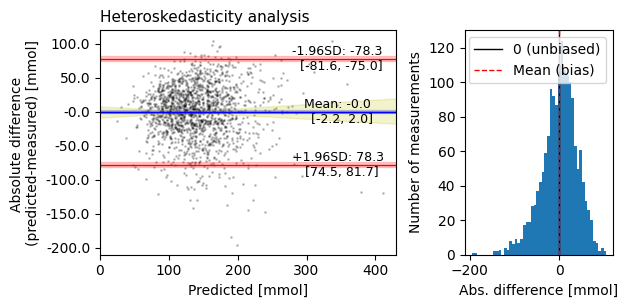

In [7]:
fig, ax = plt.subplots(1, 2, figsize=(fig_width, 0.5 * fig_width), gridspec_kw={'width_ratios': [2, 1]})

x = df[~(df.mlr_preds.isna())].mlr_preds
y = df[~(df.mlr_preds.isna())][target_col]
id_col = df[~(df.mlr_preds.isna())]['sk1_id']
diff = - bland_altman_plot(x, y, id_col, ax=ax[0], x_true=True, spacing=0.81)
# Invert the y-axis, since the error is the opposite of what is drawn
ax[0].invert_yaxis()
yticks = ax[0].get_yticks()
ax[0].set_yticklabels([-ytick for ytick in yticks])
test_gaussian(diff)
ax[1].hist(diff, bins=50)
ax[1].axvline(0, c='k', linewidth=1, label='0 (unbiased)')
ax[1].axvline(np.mean(diff), c='r', linewidth=1, linestyle='--', label='Mean (bias)')
ax[1].set_xlabel('Abs. difference [mmol]')
ax[1].set_ylabel('Number of measurements')
ax[1].legend(loc='upper right')
ax[0].set_title(
    'Heteroskedasticity analysis',
    loc='left')
ax[0].set_xlabel("Predicted [mmol]")

fig.tight_layout()
fig.savefig('../Figures/bland_altman/heteroskedasticity_analysis.png', dpi=1000)

## 6.1) Absolute differences

[1] "CAUTION! Parametric bootstrap implementation differs from Parker et al. This feature should be considered experimental."
[1] "Running bootstrap; this could take a while..."
================================================================================p-value no correlation x-y: 0.00019998000199980003.
Gaussianity tests ran with alpha=0.05:
Shapiro-Wilk Test: p-value=1.028025058028579e-31
==> Data does not look Gaussian (reject H0)
D'Agostino's $K^2$ Test: p-value=6.154541518476601e-164
==> Data does not look Gaussian (reject H0)
Statistic: 22.652
15.000: 0.575, data does not look normal (reject H0)
10.000: 0.655, data does not look normal (reject H0)
5.000: 0.785, data does not look normal (reject H0)
2.500: 0.916, data does not look normal (reject H0)
1.000: 1.090, data does not look normal (reject H0)
[1] "CAUTION! Parametric bootstrap implementation differs from Parker et al. This feature should be considered experimental."
[1] "Running bootstrap; this could take a while..."


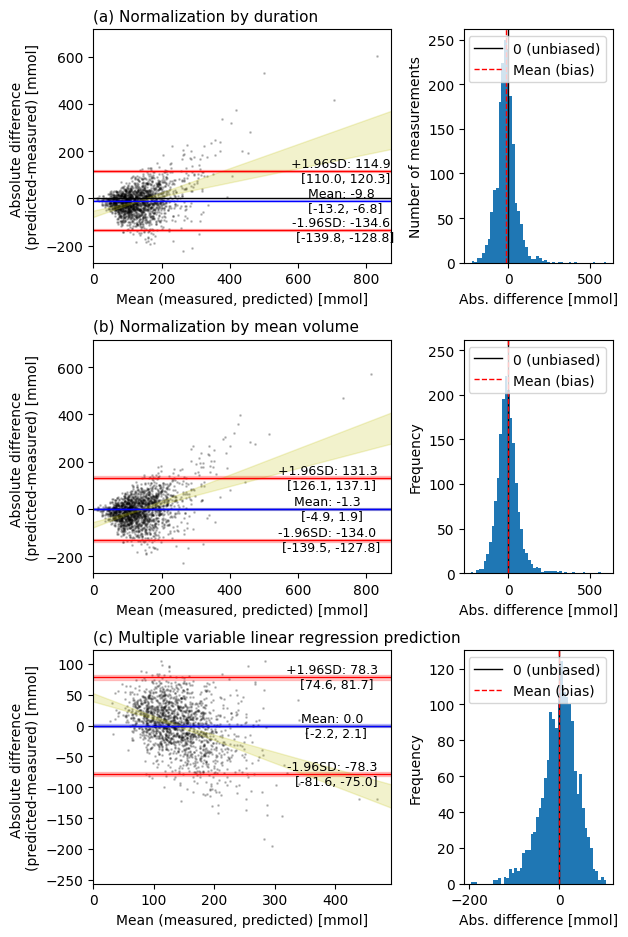

In [7]:
fig, ax = plt.subplots(3, 2, figsize=(fig_width, 1.5 * fig_width), gridspec_kw={'width_ratios': [2, 1]})

diff = bland_altman_plot(df[target_col], df[min_pred_col], df['sk1_id'], ax=ax[0, 0], spacing=0.84)
test_gaussian(diff)
ax[0, 1].hist(diff, bins=50)
ax[0, 1].axvline(0, c='k', linewidth=1, label='0 (unbiased)')
ax[0, 1].axvline(np.mean(diff), c='r', linewidth=1, linestyle='--', label='Mean (bias)')
ax[0, 1].set_xlabel('Abs. difference [mmol]')
ax[0, 1].set_ylabel('Number of measurements')
ax[0, 1].legend(loc='upper right')
ax[0, 0].set_title(
    '(a) Normalization by duration',
    loc='left')

diff = bland_altman_plot(df[target_col], df[vol_pred_col], df['sk1_id'], ax=ax[1, 0], spacing=0.81)
test_gaussian(diff)
ax[1, 1].hist(diff, bins=50)
ax[1, 1].axvline(0, c='k', linewidth=1, label='0 (unbiased)')
ax[1, 1].axvline(np.mean(diff), c='r', linewidth=1, linestyle='--', label='Mean (bias)')
ax[1, 1].set_xlabel('Abs. difference [mmol]')
ax[1, 1].set_ylabel('Frequency')
ax[1, 1].legend(loc='upper right')
ax[1, 0].set_title(
    '(b) Normalization by mean volume',
    loc='left')

x = df[~(df.mlr_preds.isna())][target_col]
y = df[~(df.mlr_preds.isna())].mlr_preds
id_col = df[~(df.mlr_preds.isna())]['sk1_id']
diff = bland_altman_plot(x, y, id_col, ax=ax[2, 0], spacing=0.81)
test_gaussian(diff)
ax[2, 1].hist(diff, bins=50)
ax[2, 1].axvline(0, c='k', linewidth=1, label='0 (unbiased)')
ax[2, 1].axvline(np.mean(diff), c='r', linewidth=1, linestyle='--', label='Mean (bias)')
ax[2, 1].set_xlabel('Abs. difference [mmol]')
ax[2, 1].set_ylabel('Frequency')
ax[2, 1].legend(loc='upper right')
ax[2, 0].set_title(
    '(c) Multiple variable linear regression prediction',
    loc='left')

# Common axis limits (not MLR)
hor_ax = np.array([0, 1])
for vert_ax in (0, 1):
    left_lim = min([f.get_xlim()[0] for f in ax[hor_ax, vert_ax]])
    right_lim = max([f.get_xlim()[1] for f in ax[hor_ax, vert_ax]])
    bottom_lim = min([f.get_ylim()[0] for f in ax[hor_ax, vert_ax]])
    top_lim = max([f.get_ylim()[1] for f in ax[hor_ax, vert_ax]])
    for f in ax[hor_ax, vert_ax]:
        f.set_xlim(left=left_lim, right=right_lim)
        f.set_ylim(bottom=bottom_lim, top=top_lim)

fig.tight_layout()
fig.savefig('../Figures/bland_altman/bland_altman_abs.png', dpi=1000)

## 6.2) Relative differences

[1] "CAUTION! Parametric bootstrap implementation differs from Parker et al. This feature should be considered experimental."
[1] "Running bootstrap; this could take a while..."
================================================================================p-value no correlation x-y: 0.0033996600339966003.
Gaussianity tests ran with alpha=0.05:
Shapiro-Wilk Test: p-value=5.0604814913865456e-23
==> Data does not look Gaussian (reject H0)
D'Agostino's $K^2$ Test: p-value=6.325461890103864e-61
==> Data does not look Gaussian (reject H0)
Statistic: 14.927
15.000: 0.575, data does not look normal (reject H0)
10.000: 0.655, data does not look normal (reject H0)
5.000: 0.785, data does not look normal (reject H0)
2.500: 0.916, data does not look normal (reject H0)
1.000: 1.090, data does not look normal (reject H0)
[1] "CAUTION! Parametric bootstrap implementation differs from Parker et al. This feature should be considered experimental."
[1] "Running bootstrap; this could take a while..."
=

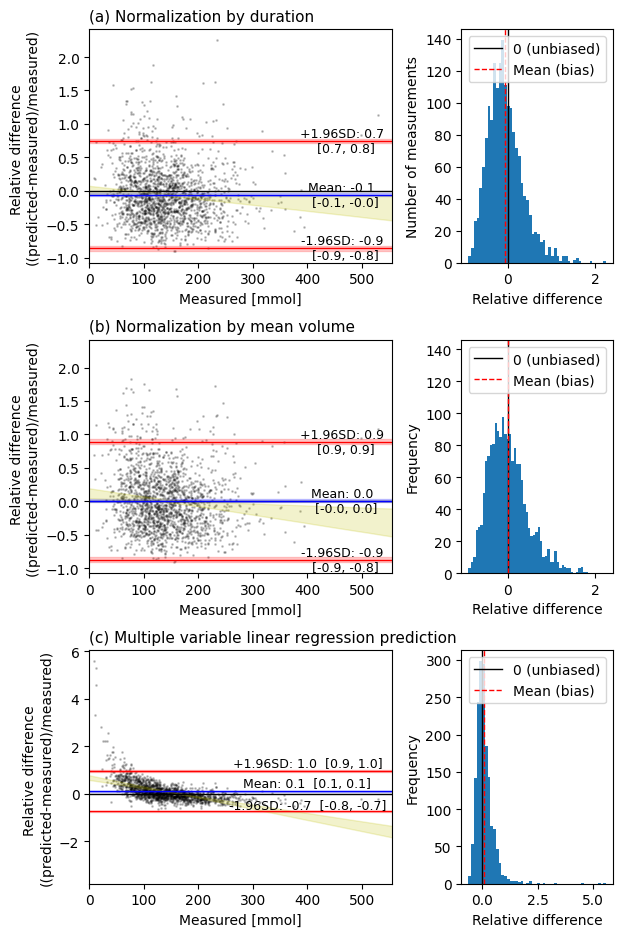

In [8]:
fig, ax = plt.subplots(3, 2, figsize=(fig_width, 1.5 * fig_width), gridspec_kw={'width_ratios': [2, 1]})

diff = bland_altman_plot(df[target_col], df[min_pred_col], df['sk1_id'], ax=ax[0, 0], relative=True, x_true=True, spacing=0.84)
test_gaussian(diff)
ax[0, 1].hist(diff, bins=50)
ax[0, 1].axvline(0, c='k', linewidth=1, label='0 (unbiased)')
ax[0, 1].axvline(np.mean(diff), c='r', linewidth=1, linestyle='--', label='Mean (bias)')
ax[0, 1].set_xlabel('Relative difference')
ax[0, 1].set_ylabel('Number of measurements')
ax[0, 1].legend(loc='upper right')
ax[0, 0].set_title(
    '(a) Normalization by duration',
    loc='left')

diff = bland_altman_plot(df[target_col], df[vol_pred_col], df['sk1_id'], ax=ax[1, 0], relative=True, x_true=True, spacing=0.84)
test_gaussian(diff)
ax[1, 1].hist(diff, bins=50)
ax[1, 1].axvline(0, c='k', linewidth=1, label='0 (unbiased)')
ax[1, 1].axvline(np.mean(diff), c='r', linewidth=1, linestyle='--', label='Mean (bias)')
ax[1, 1].set_xlabel('Relative difference')
ax[1, 1].set_ylabel('Frequency')
ax[1, 1].legend(loc='upper right')
ax[1, 0].set_title(
    '(b) Normalization by mean volume',
    loc='left')

x = df[~(df.mlr_preds.isna())][target_col]
y = df[~(df.mlr_preds.isna())].mlr_preds
id_col = df[~(df.mlr_preds.isna())]['sk1_id']
diff = bland_altman_plot(x, y, id_col, ax=ax[2, 0], relative=True, x_true=True, spacing=0.72, two_lines=False)
test_gaussian(diff)
ax[2, 1].hist(diff, bins=50)
ax[2, 1].axvline(0, c='k', linewidth=1, label='0 (unbiased)')
ax[2, 1].axvline(np.mean(diff), c='r', linewidth=1, linestyle='--', label='Mean (bias)')
ax[2, 1].set_xlabel('Relative difference')
ax[2, 1].set_ylabel('Frequency')
ax[2, 1].legend(loc='upper right')
ax[2, 0].set_title(
    '(c) Multiple variable linear regression prediction',
    loc='left')

# Common axis limits (not MLR)
hor_ax = np.array([0, 1])
for vert_ax in (0, 1):
    left_lim = min([f.get_xlim()[0] for f in ax[hor_ax, vert_ax]])
    right_lim = max([f.get_xlim()[1] for f in ax[hor_ax, vert_ax]])
    bottom_lim = min([f.get_ylim()[0] for f in ax[hor_ax, vert_ax]])
    top_lim = max([f.get_ylim()[1] for f in ax[hor_ax, vert_ax]])
    for f in ax[hor_ax, vert_ax]:
        f.set_xlim(left=left_lim, right=right_lim)
        f.set_ylim(bottom=bottom_lim, top=top_lim)

fig.tight_layout()
fig.savefig('../Figures/bland_altman/bland_altman_rel.png', dpi=1000)

## 6.3) Absolute cp. to true

[1] "CAUTION! Parametric bootstrap implementation differs from Parker et al. This feature should be considered experimental."
[1] "Running bootstrap; this could take a while..."
================================================================================p-value no correlation x-y: 0.0103989601039896.
Gaussianity tests ran with alpha=0.05:
Shapiro-Wilk Test: p-value=1.028025058028579e-31
==> Data does not look Gaussian (reject H0)
D'Agostino's $K^2$ Test: p-value=6.154541518476601e-164
==> Data does not look Gaussian (reject H0)
Statistic: 22.652
15.000: 0.575, data does not look normal (reject H0)
10.000: 0.655, data does not look normal (reject H0)
5.000: 0.785, data does not look normal (reject H0)
2.500: 0.916, data does not look normal (reject H0)
1.000: 1.090, data does not look normal (reject H0)
[1] "CAUTION! Parametric bootstrap implementation differs from Parker et al. This feature should be considered experimental."
[1] "Running bootstrap; this could take a while..."
====

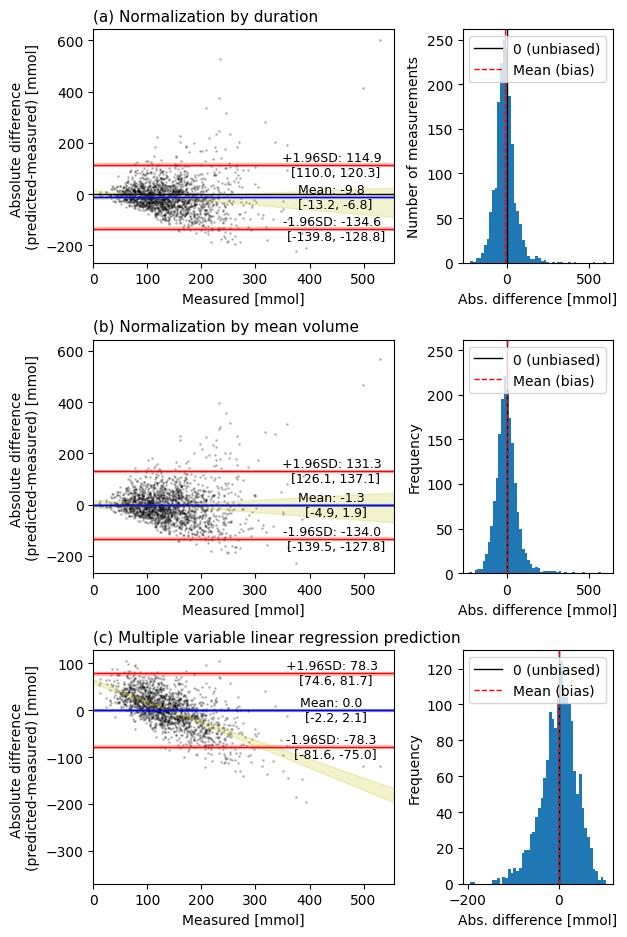

In [9]:
fig, ax = plt.subplots(3, 2, figsize=(fig_width, 1.5 * fig_width), gridspec_kw={'width_ratios': [2, 1]})

diff = bland_altman_plot(df[target_col], df[min_pred_col], df['sk1_id'], ax=ax[0, 0], relative=False, x_true=True)
test_gaussian(diff)
ax[0, 1].hist(diff, bins=50)
ax[0, 1].axvline(0, c='k', linewidth=1, label='0 (unbiased)')
ax[0, 1].axvline(np.mean(diff), c='r', linewidth=1, linestyle='--', label='Mean (bias)')
ax[0, 1].set_xlabel('Abs. difference [mmol]')
ax[0, 1].set_ylabel('Number of measurements')
ax[0, 1].legend(loc='upper right')
ax[0, 0].set_title(
    '(a) Normalization by duration',
    loc='left')

diff = bland_altman_plot(df[target_col], df[vol_pred_col], df['sk1_id'], ax=ax[1, 0], relative=False, x_true=True)
test_gaussian(diff)
ax[1, 1].hist(diff, bins=50)
ax[1, 1].axvline(0, c='k', linewidth=1, label='0 (unbiased)')
ax[1, 1].axvline(np.mean(diff), c='r', linewidth=1, linestyle='--', label='Mean (bias)')
ax[1, 1].set_xlabel('Abs. difference [mmol]')
ax[1, 1].set_ylabel('Frequency')
ax[1, 1].legend(loc='upper right')
ax[1, 0].set_title(
    '(b) Normalization by mean volume',
    loc='left')

x = df[~(df.mlr_preds.isna())][target_col]
y = df[~(df.mlr_preds.isna())].mlr_preds
id_col = df[~(df.mlr_preds.isna())]['sk1_id']
diff = bland_altman_plot(x, y, id_col, ax=ax[2, 0], relative=False, x_true=True)
test_gaussian(diff)
ax[2, 1].hist(diff, bins=50)
ax[2, 1].axvline(0, c='k', linewidth=1, label='0 (unbiased)')
ax[2, 1].axvline(np.mean(diff), c='r', linewidth=1, linestyle='--', label='Mean (bias)')
ax[2, 1].set_xlabel('Abs. difference [mmol]')
ax[2, 1].set_ylabel('Frequency')
ax[2, 1].legend(loc='upper right')
ax[2, 0].set_title(
    '(c) Multiple variable linear regression prediction',
    loc='left')

# Common axis limits (not MLR)
hor_ax = np.array([0, 1])
for vert_ax in (0, 1):
    left_lim = min([f.get_xlim()[0] for f in ax[hor_ax, vert_ax]])
    right_lim = max([f.get_xlim()[1] for f in ax[hor_ax, vert_ax]])
    bottom_lim = min([f.get_ylim()[0] for f in ax[hor_ax, vert_ax]])
    top_lim = max([f.get_ylim()[1] for f in ax[hor_ax, vert_ax]])
    for f in ax[hor_ax, vert_ax]:
        f.set_xlim(left=left_lim, right=right_lim)
        f.set_ylim(bottom=bottom_lim, top=top_lim)

fig.tight_layout()
fig.savefig('../Figures/bland_altman/bland_altman_abs_true.png', dpi=1000)

## 6.3) Log space

### 6.3.1) Normalized by duration

[1] "CAUTION! Parametric bootstrap implementation differs from Parker et al. This feature should be considered experimental."
[1] "Running bootstrap; this could take a while..."
================================================================================p-value no correlation x-y: 0.00019998000199980003.
Gaussianity tests ran with alpha=0.05:
Shapiro-Wilk Test: p-value=2.425996551000051e-14
==> Data does not look Gaussian (reject H0)
D'Agostino's $K^2$ Test: p-value=4.4284300167664645e-28
==> Data does not look Gaussian (reject H0)
Statistic: 6.751
15.000: 0.575, data does not look normal (reject H0)
10.000: 0.655, data does not look normal (reject H0)
5.000: 0.785, data does not look normal (reject H0)
2.500: 0.916, data does not look normal (reject H0)
1.000: 1.090, data does not look normal (reject H0)


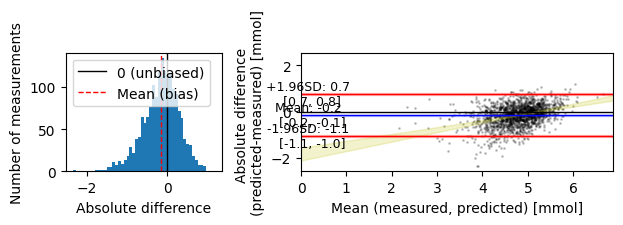

In [10]:
fig, ax = plt.subplots(1, 2, figsize=(fig_width, 0.3 * fig_width), gridspec_kw={'width_ratios': [1, 2]})
diff = bland_altman_plot(np.log(df[target_col]), np.log(df[min_pred_col]), df['sk1_id'], ax=ax[1], text_left=True)
test_gaussian(diff)
ax[0].hist(diff, bins=50)
ax[0].axvline(0, c='k', linewidth=1, label='0 (unbiased)')
ax[0].axvline(np.mean(diff), c='r', linewidth=1, linestyle='--', label='Mean (bias)')
ax[0].set_xlabel('Absolute difference')
ax[0].set_ylabel('Number of measurements')
ax[0].legend(loc='upper left')
fig.tight_layout()

### 6.3.2) Normalized by volume

[1] "CAUTION! Parametric bootstrap implementation differs from Parker et al. This feature should be considered experimental."
[1] "Running bootstrap; this could take a while..."
================================================================================p-value no correlation x-y: 0.00019998000199980003.
Gaussianity tests ran with alpha=0.05:
Shapiro-Wilk Test: p-value=2.784583883462012e-14
==> Data does not look Gaussian (reject H0)
D'Agostino's $K^2$ Test: p-value=4.394330803574224e-26
==> Data does not look Gaussian (reject H0)
Statistic: 5.832
15.000: 0.575, data does not look normal (reject H0)
10.000: 0.655, data does not look normal (reject H0)
5.000: 0.785, data does not look normal (reject H0)
2.500: 0.916, data does not look normal (reject H0)
1.000: 1.090, data does not look normal (reject H0)


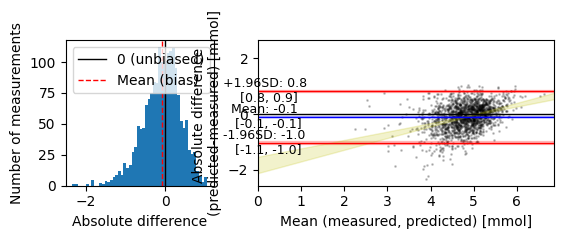

In [11]:
fig, ax = plt.subplots(1, 2, figsize=(fig_width, 0.3 * fig_width), gridspec_kw={'width_ratios': [1, 2]})
diff = bland_altman_plot(np.log(df[target_col]), np.log(df[vol_pred_col]), df['sk1_id'], ax=ax[1], text_left=True)
test_gaussian(diff)
ax[0].hist(diff, bins=50)
ax[0].axvline(0, c='k', linewidth=1, label='0 (unbiased)')
ax[0].axvline(np.mean(diff), c='r', linewidth=1, linestyle='--', label='Mean (bias)')
ax[0].set_xlabel('Absolute difference')
ax[0].set_ylabel('Number of measurements')
ax[0].legend(loc='upper left')

In [12]:
#fig, ax = plt.subplots(figsize=(10, 6))
#sm.graphics.mean_diff_plot(df[target_col], df[min_pred_col], ax=ax, scatter_kwds={'s': 2});

In [13]:
# log space
#fig, ax = plt.subplots(figsize=(10, 6))
#sm.graphics.mean_diff_plot(np.log(df[target_col]), np.log(df[min_pred_col]), ax=ax, scatter_kwds={'s': 2});

In [14]:
#fig, ax = plt.subplots(figsize=(10, 6))
#sm.graphics.mean_diff_plot(df[target_col], df.una_un_mmol * (df.ucrt_u24_umol / df.ucrt_un_umol), ax=ax, scatter_kwds={'s': 2});